In [4]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import joblib
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

In [5]:
print(os.listdir('/Users/anikasharma/Downloads/archive (4)/data'))

['.DS_Store', 'test', 'train']


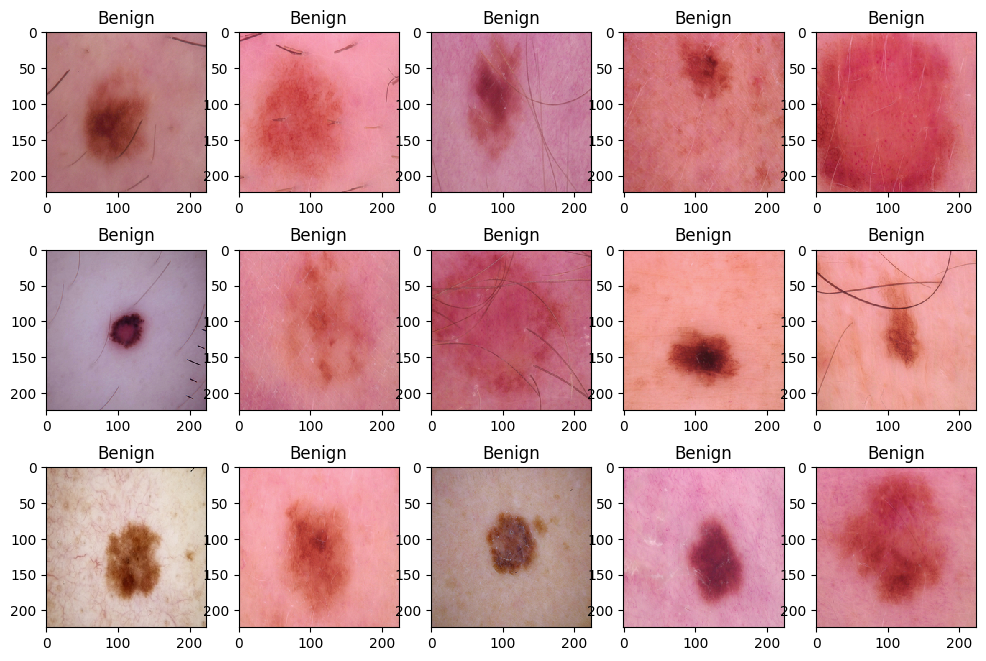

In [6]:
beni_training_data = '/Users/anikasharma/Downloads/archive (4)/data/train/benign'
mali_training_data = '/Users/anikasharma/Downloads/archive (4)/data/train/malignant'
beni_testing_data = '/Users/anikasharma/Downloads/archive (4)/data/test/benign'
mali_testing_data = '/Users/anikasharma/Downloads/archive (4)/data/test/malignant'
read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
img_benign = [read(os.path.join(beni_training_data, filename)) for filename in os.listdir(beni_training_data)]
benign = np.array(img_benign, dtype='uint8')
img_malignant = [read(os.path.join(mali_testing_data, filename)) for filename in os.listdir(mali_testing_data)]
malignant = np.array(img_malignant, dtype='uint8')
imgs_benign = [read(os.path.join(beni_testing_data, filename)) for filename in os.listdir(beni_testing_data)]
X_benign_test = np.array(imgs_benign, dtype='uint8')
imgs_malignant = [read(os.path.join(mali_testing_data, filename)) for filename in os.listdir(mali_testing_data)]
X_malignant_test = np.array(imgs_malignant, dtype='uint8')


y_benign = np.zeros(benign.shape[0])
y_malignant = np.ones(malignant.shape[0])
y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])
X_train = np.concatenate((benign, malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)
X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()



In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
from sklearn.svm import SVC

model = SVC()

model.fit(X_train.reshape(X_train.shape[0],-1), y_train)

SVC()

In [9]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test.reshape(X_test.shape[0],-1))

print(accuracy_score(y_test, y_pred))

0.7696969696969697


In [10]:
joblib.dump(model, 'skin_lesion_svm_model.pkl')

['skin_lesion_svm_model.pkl']